# Effect of solenoid on beam 

Information was requested on how much the beam will be influenced by the presence of the electromagnetic pump on the colent in the target.
<br> 
For this we need to consider the rigidity of the beam  
$$
[B\rho] = \frac{p}{q} = \frac{\gamma mc \beta }{q}= \frac{mc}{q} \sqrt{(\frac{E}{mc^2})^2+2(\frac{E}{mc^2}) }
$$
<br>


In [1]:
import numpy as np
BeamE = 800 # 800 Mev/c beam energy  
E= BeamE + 931# total energy 
C = 1       # speed of light =1 
M = 1       # Mass of protion 
q = +1      # charge of particle 
Bp = 3.3357*(M*C/q)*np.sqrt(((E*1e-3)/(M*C*C))**2 +2*((E*1e-3)/(M*C*C)))
print("Beam rigidity is %.2f " % Bp + " [T/m]")

Beam rigidity is 8.48  [T/m]


The equations of motion for the beam behavour in the solenoid is quite long and can be found here <br>
(https://people.nscl.msu.edu/~lund/msu/phy905_2018/lec_lund/03.lec.solenoids.pdf)
<br>but the outcome is: 
$$
\begin{bmatrix}
 1&0  &0  &0 \\ 
 0&1  & -k_l &0 \\ 
 0&0  & 1 &0 \\ 
k_l & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 &  \frac{1}{2K_l}sin(2k_l\hat{l})& 0 & \frac{1}{2K_l}sin^2(2k_l\hat{l}) \\ 
0 & cos(2k_l\hat{l}) & 0 &sin(2k_l\hat{l}) \\ 
0 &  \frac{1}{K_l}sin^2(2k_l\hat{l}) & 1 & \frac{1}{2K_l}sin(2k_l\hat{l})\\ 
1 & -sin(2k_l\hat{l}) & 0 & cos(2k_l\hat{l})
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 &0 \\ 
0 & 1 & k_l &0 \\ 
0 & 0 &  1&0 \\ 
-k_l &0  & 0 & 1
\end{bmatrix}
=M_s; 
$$
where $K_l= \frac{\hat{B_0}}{2B\rho}$
<br>
This gives the transport matirx for a 'hard edged' solenoid of length $L$ and feild $B=(B_x,B_y,B_z)$
<br>
$$ 
M_{sol}=  
\begin{bmatrix}
cos^2(\Phi)              & \frac{1}{2K_l}sin(2\Phi) & \frac{1}{2}sin(2\Phi)    & \frac{1}{K_l}sin^2(\Phi) \\ 
\frac{-k_L}{2}sin(2\Phi) & cos^2(\Phi)              & -k_lsin^2\Phi            & \frac{1}{2}sin(2\Phi) \\ 
\frac{-1}{2}sin(2\Phi)   & \frac{-1}{K_l}sin^2      & cos^2\Phi  1             & \frac{1}{2K_l}sin(2\Phi) \\ 
k_l sin^2\Phi            & \frac{-1}{2}sin(2\Phi)   & \frac{-k_l}{2}sin(2\phi) & cos^2\Phi
\end{bmatrix}
$$
<br>
solenoids are a little more tricky than quadrapoles to compute. 

Make the simple inclusion of a very basic beam 
$$ X_{beam} = 
\begin{bmatrix}
 X \\ 
 X' \\ 
 Y \\ 
 Y'
 \end{bmatrix}
 = 
 \begin{bmatrix}
 X \\ 
 \frac{P_x}{P} \\ 
 Y \\ 
  \frac{P_y}{P}
 \end{bmatrix}
 $$

In [23]:
#for the beam 
x  = 0.036
xp = 0.00002
y  = x
yp = xp
X = [x,xp,y,yp]
print("initial beam")
print(np.transpose(X))

initial beam
[3.6e-02 2.0e-05 3.6e-02 2.0e-05]


In [24]:
#estimation of the b field in the coild at peak amplitude 
I = 100       # Amps 
n = 40       # n turns
l  = 1.4     # solnoid length in m was 1.2 
mu= 1.256e-6 # N/A^2  = 1/e0c^2 
Bz0 =  mu*((1.0*n)/(l*1.0))*I
print("Expected B-field in Z %.6f [mT]" %(Bz0*1e3))


Expected B-field in Z 3.588571 [mT]


In [25]:
#create the transport matrix for the solenoid 
#Bz0 = 0.1           # [Tesla]  note Br = -(1/2) b0'(z)r for 1st order solutions range given by tania 
kl = Bz0/(2*Bp)      # 
d  = 1.5             # drift to the target 
P  = kl*l

#defined as a function for easier use later 
def SolTransMatrix(P=0.5, kl=0.5):
    return np.matrix([[        np.cos(P)**2     , (1.0/(2*kl))*np.sin(2*P)  , (1.0/(2))*np.sin(P)      , (1.0/(kl))*(np.sin(P)**2)],
                     [ (-(kl)/2)*np.sin(2*P)    , np.cos(P)**2              , (-kl)*(np.sin(P)**2)     ,   (1.0/(2))*np.sin(2*P)  ],
                     [ (-1.0/(2))*np.sin(2*P)   , (-1.0/(kl))*(np.sin(P)**2), np.cos(P)**2             , (1.0/(2*kl))*np.sin(2*P) ],
                     [ (kl)*(np.sin(P)**2)      , (-1.0/(2))*np.sin(2*P)    , (kl/2)*np.sin(2*P)       , np.cos(P)**2             ]])
print("the resulting transport matirx is given as: ")
Msol= SolTransMatrix(P,kl)
print(Msol)

the resulting transport matirx is given as: 
[[ 9.99999912e-01  1.39999992e+00  1.48163589e-04  4.14858043e-04]
 [-6.27212814e-08  9.99999912e-01 -1.85860211e-11  2.96327165e-04]
 [-2.96327165e-04 -4.14858043e-04  9.99999912e-01  1.39999992e+00]
 [ 1.85860211e-11 -2.96327165e-04  6.27212814e-08  9.99999912e-01]]


Multiply the beam with the additional transport drift space after the sol, where $M_d$ is the addtional drift space. <br>
$$
M_d=
\begin{bmatrix}
 1   & l_d & 0   & 0 \\ 
 0   & 1   & 0   & 0 \\ 
 0   & 0   & 1   & l_d \\ 
 0   & 0   & 0   & 1
\end{bmatrix}
$$
<cb>
This then gives the transported matrix from start to finish as:
<cb>
$$
X_{Target} = M_d . M_{sol} . X_{beam}
$$

In [26]:
#drift matrix 
def DriftTransMatrix(l=0.5):
    return np.matrix([[ 1 , l , 0 , 0  ],
                      [ 0 , 1 , 0 , 0 ],
                      [ 0 , 0 , 1 , l  ],
                      [ 0 , 0 , 0 , 1 ]])
                      

In [27]:
# calcultaion of final transported beam 
Md = DriftTransMatrix(d)
Ms = SolTransMatrix(P,kl)
Mt = np.matmul(Ms,Md)
Mt = np.matmul(Md,Mt)
Xt = np.matmul(Mt,X)

print("resulting beam from passage in solenoid")
print(Xt)
print("this dives the overall change in the beam as")
delta = X-Xt
print(delta)
print("or simply  dr = ")
r = np.sqrt((delta[0,0])**2+((delta[0,3])**2))*1000 
print(r," [mm]")



resulting beam from passage in solenoid
[[3.60933490e-02 2.00036643e-05 3.60773064e-02 1.99963322e-05]]
this dives the overall change in the beam as
[[-9.33489623e-05 -3.66426968e-09 -7.73063680e-05  3.66778208e-09]]
or simply  dr = 
0.09334896232497879  [mm]


[0.001      0.00133352 0.00177828 0.00237137 0.00316228 0.00421697
 0.00562341 0.00749894 0.01       0.01333521 0.01778279 0.02371374
 0.03162278 0.04216965 0.05623413 0.07498942 0.1        0.13335214
 0.17782794 0.23713737 0.31622777 0.4216965  0.56234133 0.74989421
 1.        ]


Text(0.5, 1.0, 'Estimated Beam expansion from Target pump')

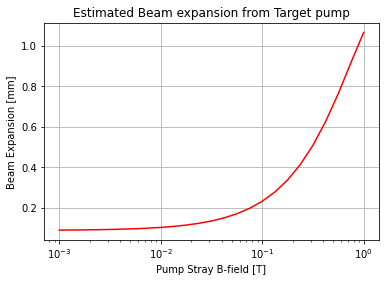

In [28]:
# make a plot of the influence with scaling fields 
import matplotlib.pyplot as plt

#define the B-field space to scan over 
minB = -3    # tesla 10 ^ value 
maxB = 0     # Tesla
nSteps = 25 # number of the steps to take in space 
Bvar= np.logspace(minB,maxB,num=nSteps, base=10)
print(Bvar)
#resulting vector 
Res = np.zeros(len(Bvar))
i=0
while i< len(Bvar):    
    kl =(Bvar[i])/(2*Bp)      # calculate k for this field 
    P  = kl*l
    #make the transport matrix    
    Md = DriftTransMatrix(d)
    Ms = SolTransMatrix(P,kl)
    Mt = np.matmul(Ms,Md)
    Mt = np.matmul(Md,Mt)
    Xt = np.matmul(Mt,X)
    delta = X-Xt
    r = np.sqrt((delta[0,0])**2+((delta[0,3])**2))*1000 
    Res[i]= r
    i+=1
#plot the resulting effect 
p1=plt.semilogx(Bvar,Res,'r', label = "Beam Expansion")
#p1=plt.loglog(Bvar,Res,'r', label = "Beam Expansion")
plt.xlabel('Pump Stray B-field [T]')
plt.ylabel('Beam Expansion [mm]')
plt.grid()
plt.title("Estimated Beam expansion from Target pump")
